In [ ]:
cd ..

In [18]:
import os
import pandas as pd
from src.analyzer import *
%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

def plot_fill_between(t, data, label='', c = None, k=1.):
    """
    Create a plot of the data +/- k standard deviations.
    
    Parameters
    ----------
    t : array, shape (timesteps, )
        Times for each data point
    data : array, shape (samples, timesteps)
        Data to plot mean and +/- one sdev as a function of time
    k : float
        Scaling factor for standard deviations
    """
    mm = data.mean(0)
    sd = data.std(0) * k
    plt.fill_between(t, mm - sd, mm + sd, alpha=0.5, color=c)
    plt.plot(t, mm, color=c, label=label)

def build_data_frame(pkl_fn_, param_):
    out_ = []
    for pkl_fn in pkl_fn_:
        da = DataAnalyzer.fromfilename(pkl_fn)
        out = [da.data[key] for key in param_]
        out = out + da.snr_list()
        out_.append(out)

    t_ = da.time_list()

    data = pd.DataFrame.from_records(
        out_, columns=param_ + list(t_))
    return data, t_

def plot_comparison(data, t_, param):
    grouped = pd.groupby(data, [param])
    plt.title('SNR as a function of time')
    c_ = ['g', 'b', 'r', 'y', 'm', 'c']
    for c, (name, group) in zip(c_, grouped):
        label = '{}: {}'.format(param, name)
        plot_fill_between(t_, group[list(t_)], label=label, c=c, k=1)
        plt.xlabel('time (ms)')
    plt.legend(loc='upper left')

In [36]:
param_ = ['GAMMA', 'lamb', 'N_g_itr', 'tau', 'N_P'] # , 'N_itr']
folder_ = ['gamma', 'lamb', 'n_g_itr', 'tau', 'n_p'] # , 'n_itr']


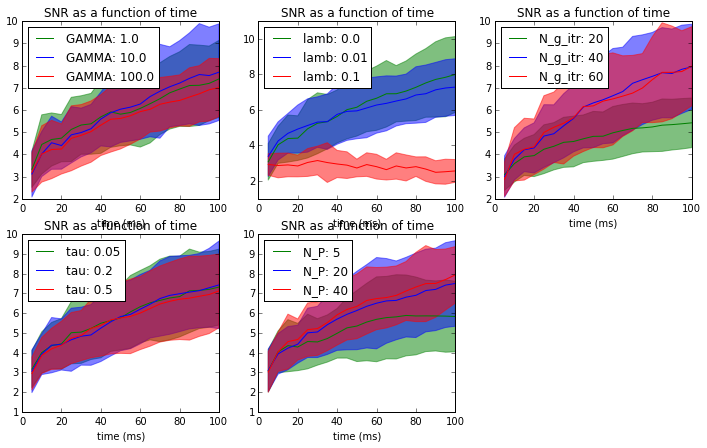

In [37]:
plt.figure(figsize=(12, 7))
for i, (param, folder) in enumerate(zip(param_, folder_)):
    output_dir = os.path.join('output/parameter_cv', folder)
    pkl_fn_ = [os.path.join(output_dir, fn) for fn in os.listdir(output_dir) if fn.endswith('.pkl')]
    data, t_ = build_data_frame(pkl_fn_, param_)
    plt.subplot(2, 3, i + 1)
    plot_comparison(data, t_, param)